# ONE: 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import pandas as pd
df = pd.read_csv("D:/Course/ExcelR Classroom Study/Data Science Assignment/16. Text Mining/Elon_musk.csv", encoding='latin1')
#tweets = tweets.assign(Time=pd.to_datetime(tweets.Time)).drop('row ID', axis='columns')
df.head(3)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!


In [2]:
df.rename(columns = {"Unnamed: 0": "row_number", "Text":"tweet"}, inplace = True)
df.head()

,row_number,tweet
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
import re
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text
# Clean The Text
df["tweet"] = df["tweet"].apply(cleantext)
df.head()

,row_number,tweet
0,1,Im an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [4]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [5]:
from textblob import TextBlob
# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["tweet"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df

,row_number,tweet,subjectivity,polarity
0,1,Im an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


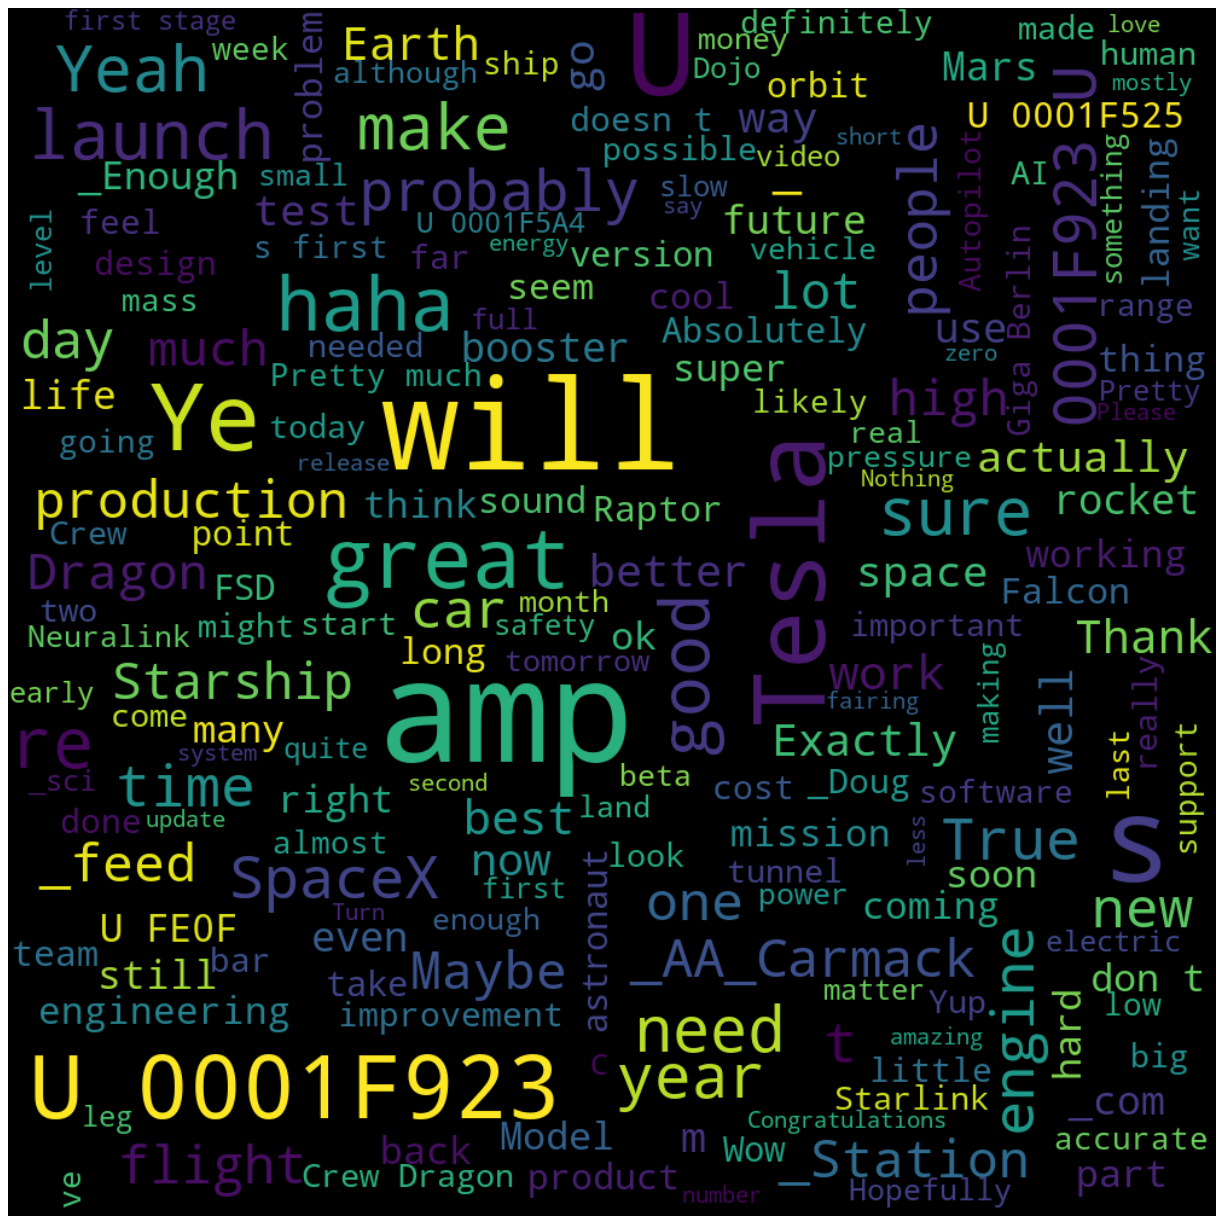

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df["tweet"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [8]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)
# Print The Data
df

,row_number,tweet,subjectivity,polarity,analysis
0,1,Im an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [9]:
positive_tweets = df[df['analysis'] == 'Positive']
negative_tweets = df[df['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['tweet'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['tweet'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - Im an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.


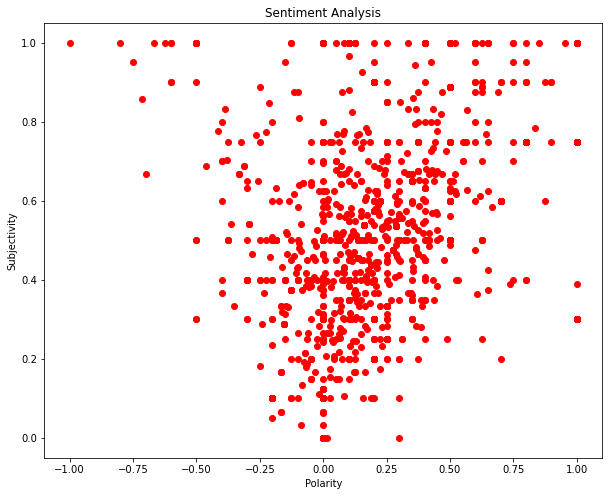

In [10]:
plt.figure(figsize=(10, 8))

for i in range(0, df.shape[0]):
    plt.scatter(df["polarity"][i], df["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [11]:
len(positive_tweets) / len(negative_tweets)

4.036529680365297

### Since that number is positive, and quite high of a ratio, we can also conclude that Elon is a positive guy.